# Minimax approximate polynomial for homomorphic comparison

Approximation function?


In [4]:
import numpy as np
from math import sqrt, ceil
from numpy import polynomial as P
import matplotlib.pyplot as plt 
import math

from cipher import *
from ciphertext import Plaintext
from scheme import *
from algorithms import Algorithms 
from stats import Statistics
from context import set_all



ModuleNotFoundError: No module named 'cipher'

In [14]:
def relu(arr):
    _arr = arr.copy()
    _arr[_arr<0]=0
    return _arr

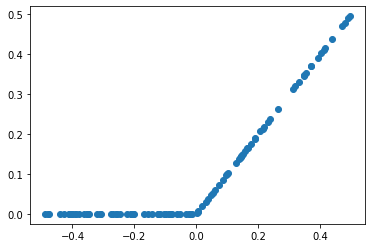

In [16]:
arr = np.random.rand(100) - 0.5
plt.scatter(arr, relu(arr))

In [13]:
# Ordinary funcitons
def get_depth(degree:int):
    if degree > 1:
        return ceil(np.log2(degree))
    elif degree == 1:
        return 0

In [14]:
for degree in range(2,10):
    print(degree, )

2
3
4
5
6
7
8
9


In [140]:
# degrees from i=1 to k
# from Eunsang Lee+21


MINIMUM_MULT = {4:[3,3,5],
                5:[5,5,5],
                6:[3,5,5,5],
                7:[3,3,5,5,5],
                8:[5,5,5,5,9],
                9:[5,5,5,5,5,5],
               10:[5,5,5,5,5,9],
               11:[3,5,5,5,5,5,5],
               12:[3,5,5,5,5,5,9],
               13:[3,5,5,5,5,5,5,5],
               14:[3,3,5,5,5,5,5,5,5],
               15:[3,3,5,5,5,5,5,5,9],
               16:[3,3,5,5,5,5,5,5,5,5],
               17:[5,5,5,5,5,5,5,5,5,5],
               18:[3,3,5,5,5,5,5,5,5,5,5],
               19:[5,5,5,5,5,5,5,5,5,5,5],
               20:[5,5,5,5,5,5,5,5,5,5,9]}

MINIMUM_DEPTH = {4:[27],
                 5:[7,13],
                 6:[15,15],
                 7:[7,7,13],
                 8:[7,15,15],
                 9:[7,7,7,13],
                10:[7,7,13,15],
                11:[7,15,15,15],
                12:[15,15,15,15],
                13:[15,15,15,31],
                14:[7,7,15,15,27],
                15:[7,15,15,15,27],
                16:[15,15,15,15,27],
                17:[15,15,15,29,29],
                18:[15,15,29,29,31],
                19:[15,29,31,31,31],
                20:[29,31,31,31,31]}

def poly_eval(ctxt, coeff):
    """Evaluate polynomial expression of coefficients "coeff"
    
    parameters
    ----------
    ctxt: Ciphertext
    coeff: Coefficients of polynomial starting from 0-th degree
    
    
    exmaple
    -------
        y = ax + bx**2 + cx**3 + d
        y_fhe = poly_eval(ctxt, [d,a,b,c])
    
    """
    degree = len(coeff)
    logp = ctxt.logp
    
    cpows = ev.powerExtended(ctxt, logp, degree) # compute x, x**2, x**3, x**4
    aixi = Ciphertext()
    res = Ciphertext()
    for cpw, coef in zip(cpows, coeff[1:]):
        ev.ev.mult_by_plain(aixi, cpw, coef, logp) ## aixi gets the output. It's logp is maintained and updated.
        bits_down = res.logq - aixi.logq # rescale only if res.logp > aixi.logp
        ev.rescale_by(res, bits_down, inplace=True)
        ev.add(res, aixi)
    return res

def sgn(ctxt, alpha:int, min_mult=True, min_depth=False):
    """approximate sign function
    
    parameters
    ----------
    ctxt: Ciphertext
    alpha: positive int, tolerance parameter. err <= 2**alpha
    """
    assert alpha > 3 and isinstance(alpha, int), "alpha: only positive int > 3 are allowed"
    
    _ctxt = ctxt.copy()
    
    # f_a(x), f_b(x), f_c(x), f_d(x), ..., f_x(x) of lower degrees
    approx_poly_degrees = MINIMUM_MULT[alpha]
    
    # f_x(...(f_d(f_c(f_b(f_a(x))))))
    for degree in approx_poly_degrees:
        #coeff = minimax(-1, 1.0001, degree)
        #_ctxt = poly_eval(_ctxt, coeff) # auto rescaled, but not auto bootstrapped
    
        #max_depth = get_depth(degree)
    
        fun = minimax(-1.1, 1.11, degree)
        _ctxt = fun(_ctxt)
        print("degree", degree)
        print(_ctxt)
        plt.plot(_ctxt)
        
    return _ctxt
    
def relu_fhe(ctxt, alpha:int):
    """approximate relu function
    
    parameters
    ----------
    ctxt: Ciphertext
    alpha: tolerance parameter. err <= 2**alpha
    """
    is_positive = sgn(ctxt.copy())
    
    return ev.mult(ctxt, is_positive, alpha)
    
    
from numpy import polynomial as P
def signv(x):
    ret = np.ones(len(x))
    ret[x<0] = -1
    return ret

def minimax(xl1, xr1, xl2, xr2, deg, npoints = 100):
    xx = np.concatenate((np.linspace(xl1,xr1,npoints), 
                         np.linspace(xl2,xr2,npoints)))
    chev = P.chebyshev.Chebyshev.fit(xx, signv(xx), deg=deg) # F.elu
    power = chev.convert(kind=P.Polynomial)
    return power

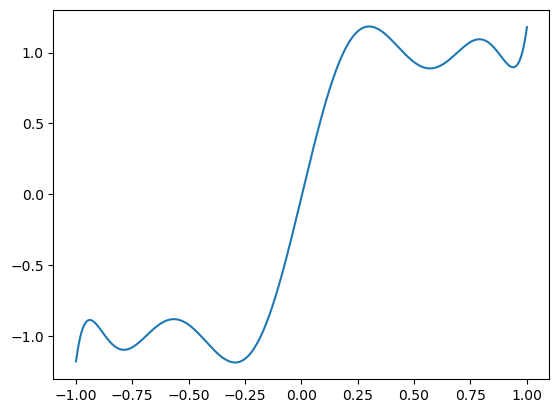

In [142]:
fun = minimax(-1.0, -0.001, 0.01, 1.001, 9)

plt.plot(xx2, fun(xx2))

In [52]:
degrees = MINIMUM_DEPTH[12]

In [190]:
def _appr_sign_funs(degrees, margin = 0.01, eps=0.02): 
    xin = np.linspace(-0.999, 1.001, 100000)

    funs=[]
    for deg in degrees:
        print(deg, eps, xin.min()-margin, -eps+margin, eps-margin, xin.max()+margin)
        fun = minimax(xin.min()-margin, -eps+margin, eps-margin, xin.max()+margin, deg, npoints = 2*deg+1)
        xin = fun(xin)
        eps = 1-(1-2*eps)**2
        funs.append(fun)
    return funs
                    
def appr_sign(xin, funs):
    for fun in funs:
        xin = fun(xin)
    return xin


15 0.02 -1.009 -0.01 0.01 1.011
15 0.07840000000000003 -1.1931301679451465 -0.06840000000000003 0.06840000000000003 1.1944333325999297
15 0.2890137600000001 -1.1589583495795004 -0.2790137600000001 0.2790137600000001 1.1595640753441199
15 0.8219392261226498 -1.0210020494719052 -0.8119392261226498 0.8119392261226498 1.0210368948813757


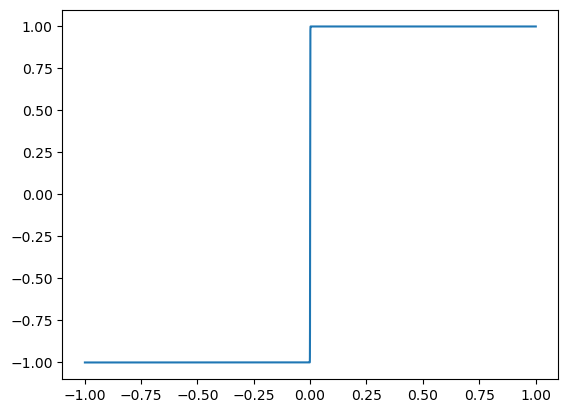

In [191]:
xin = np.linspace(-0.999, 1.001, 100000)

out = xin.copy()
funs = _appr_sign_funs(MINIMUM_DEPTH[12])
out = appr_sign(xin, funs)
plt.plot(xin, out)

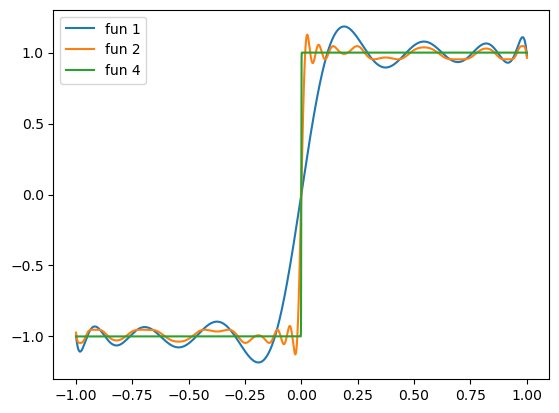

In [152]:
fun = minimax(-1.0, -0.01, 0.01, 1.001, degrees[0], npoints=2*degrees[0]+1)
xx22 = fun(xx2)
fun2 = minimax(-, -0.1, 0.1, 1.35, degrees[1], npoints=2*degrees[1]+1)
xx33 = fun2(xx22)
fun3 = minimax(xx33.min()-margin, -0.5, 0.5, xx33.max()+margin, degrees[2], npoints=2*degrees[2]+1)
xx44 = fun3(xx33)
fun4 = minimax(xx44.min()-margin, -0.7, 0.7, xx44.max()+margin, degrees[3], npoints=2*degrees[3]+1)

plt.plot(xx2, fun(xx2), label="fun 1")
plt.plot(xx2, fun2(fun(xx2)), label="fun 2")
#plt.plot(xx2, fun3(xx2))
#plt.plot(xx2, fun4(xx2))
out = fun4(fun3(fun2(fun(xx2))))
plt.plot(xx2, fun4(fun3(fun2(fun(xx2)))), label="fun 4")
plt.legend()

In [153]:
ans = signv(xx2)

In [188]:
np.sum(np.isclose(out, ans, atol=2**-12)) / len(out)

0.99832

In [194]:
def relu_custom(xin, degrees):
    funs = _appr_sign_funs(degrees)
    out = appr_sign(xin, funs)

    return xin * (out+1)/2


In [201]:
def relu(xin):
    xin_ = xin.copy()
    xin_[xin_<0] = 0
    return xin_

15 0.02 -1.009 -0.01 0.01 1.011
15 0.07840000000000003 -1.1931301679451465 -0.06840000000000003 0.06840000000000003 1.1944333325999297
15 0.2890137600000001 -1.1589583495795004 -0.2790137600000001 0.2790137600000001 1.1595640753441199
15 0.8219392261226498 -1.0210020494719052 -0.8119392261226498 0.8119392261226498 1.0210368948813757


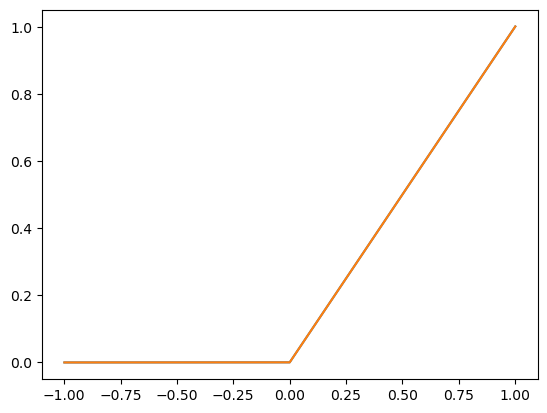

In [205]:
xin = np.linspace(-0.999, 1.001, 100000)

rappx = relu_custom(xin, MINIMUM_DEPTH[12])
rans = relu(xin)

plt.plot(xin, rappx, label="apprx")
plt.plot(xin, rans, label="correct")
plt.show()

In [206]:
np.sum(np.isclose(rappx, rans, atol=2**-12)) / len(rans)

1.0

In [2]:
def sign(x):
    if x < 0:
        return -1
    else:
        return 1

In [5]:
deg = 7
ch = Chebyshev(-1,1.01,deg, sign)

In [8]:
ch.eval

<bound method Chebyshev.eval of <__main__.Chebyshev object at 0x7fe7a7ba94e0>>

In [17]:
context, ev, encoder, encryptor, decryptor = set_all(30, 150, 12)
nslots = context.params.nslots

## Inlined version

In [ ]:
alpha = 4
min_mult = True

## sgn()
_ctxt = ctxt.copy()

approx_poly_degrees = [3,3,5]

degree = 3
coeff = minimax(3)
# coeff = [a,b,c,d] (float)
max_depth = get_depth(3) # == 2

## poly_eval()


